In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
df_charging = pd.read_pickle("data/charging_modified.pkl")

### 1) Time a car used a station without charging (in hours)

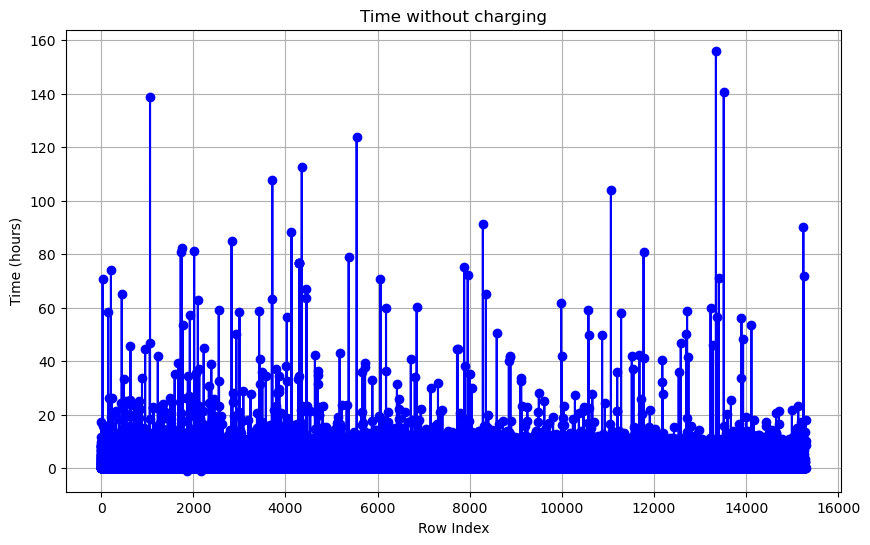

In [28]:
# Plot the time differences
plt.figure(figsize=(10, 6))
plt.plot(df_charging['NoChargingTimeHours'], marker='o', linestyle='-', color='b')
plt.title('Time without charging')
plt.xlabel('Row Index')
plt.ylabel('Time (hours)')
plt.grid(True)
plt.show()

In [4]:
print(df_charging['NoChargingTimeHours'].describe())

count    62362.000000
mean         2.853173
std          3.989508
min         -0.998889
25%          0.003889
50%          1.613472
75%          4.927222
max        156.121389
Name: NoChargingTimeHours, dtype: float64


In [9]:
# Problem: negative values not possible -> doneChargingTime is later than disconnectTime
df_charging[df_charging['NoChargingTimeHours'] < 0]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,NoChargingTime,...,month,user_paymentRequired_values,user_userID,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment
Index,,,,,,,,,,,,,,,,,,,,,
12,5e23b149f9af8b5fe4b973db,2020-01-02 15:04:38+00:00,2020-01-02 22:08:39+00:00,2020-01-02 22:09:36+00:00,25.567,1,AG-1F07,1-1-178-824,528.0,-1 days +23:59:03,...,1,True,528.0,"Fri, 03 Jan 2020 00:19:38 GMT","Thu, 02 Jan 2020 15:04:49 GMT",555.0,200.0,50.00,250.0,-24.433
20,5e23b149f9af8b5fe4b973e3,2020-01-02 15:28:47+00:00,2020-01-02 19:01:54+00:00,2020-01-02 19:02:51+00:00,7.417,1,AG-1F02,1-1-193-827,1283.0,-1 days +23:59:03,...,1,True,1283.0,"Thu, 02 Jan 2020 19:26:47 GMT","Thu, 02 Jan 2020 15:29:16 GMT",238.0,120.0,42.00,350.0,-34.583
25,5e23b149f9af8b5fe4b973e8,2020-01-02 15:42:05+00:00,2020-01-02 21:58:45+00:00,2020-01-02 21:59:42+00:00,36.701,1,AG-3F23,1-1-179-797,474.0,-1 days +23:59:03,...,1,True,474.0,"Fri, 03 Jan 2020 00:34:05 GMT","Thu, 02 Jan 2020 15:42:11 GMT",532.0,80.0,32.00,400.0,4.701
26,5e23b149f9af8b5fe4b973e9,2020-01-02 15:57:24+00:00,2020-01-02 16:35:37+00:00,2020-01-02 16:36:34+00:00,3.689,1,AG-3F31,1-1-179-781,724.0,-1 days +23:59:03,...,1,True,724.0,"Thu, 02 Jan 2020 17:26:24 GMT","Thu, 02 Jan 2020 15:57:39 GMT",89.0,20.0,8.00,400.0,-4.311
33,5e23b149f9af8b5fe4b973f0,2020-01-02 16:34:35+00:00,2020-01-02 18:49:41+00:00,2020-01-02 18:50:38+00:00,7.120,1,AG-3F19,1-1-179-790,2276.0,-1 days +23:59:03,...,1,True,2276.0,"Thu, 02 Jan 2020 19:19:35 GMT","Thu, 02 Jan 2020 16:35:06 GMT",165.0,30.0,18.00,600.0,-10.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,5d574ad2f9af8b4c10c03645,2019-07-31 14:36:02+00:00,2019-07-31 22:34:10+00:00,2019-07-31 22:35:10+00:00,9.459,1,AG-4F49,1-1-191-803,826.0,-1 days +23:59:00,...,7,True,826.0,"Wed, 31 Jul 2019 21:25:02 GMT","Wed, 31 Jul 2019 14:36:17 GMT",409.0,140.0,35.00,250.0,-25.541
10077,5d574ad2f9af8b4c10c0364c,2019-07-31 14:45:02+00:00,2019-07-31 23:43:20+00:00,2019-07-31 23:44:19+00:00,8.289,1,AG-4F34,1-1-191-804,572.0,-1 days +23:59:01,...,7,True,572.0,"Wed, 31 Jul 2019 23:49:02 GMT","Wed, 31 Jul 2019 14:45:37 GMT",544.0,40.0,9.24,231.0,-0.951
10078,5d574ad2f9af8b4c10c0364d,2019-07-31 14:45:29+00:00,2019-07-31 22:01:32+00:00,2019-07-31 22:02:32+00:00,31.376,1,AG-4F42,1-1-191-811,1626.0,-1 days +23:59:00,...,7,True,1626.0,"Wed, 31 Jul 2019 18:14:29 GMT","Wed, 31 Jul 2019 14:45:50 GMT",209.0,190.0,38.00,200.0,-6.624


### 2) Charging time per session (in hours)

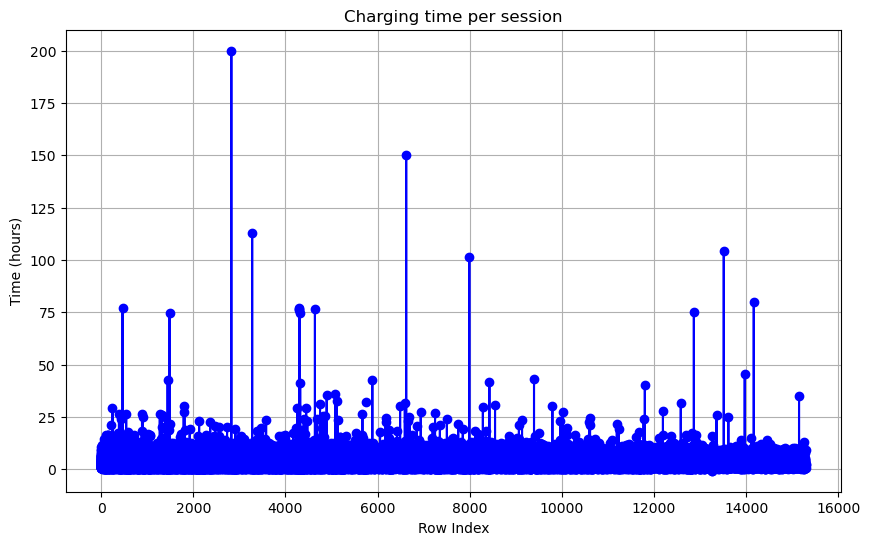

In [29]:
# Plot the time differences
plt.figure(figsize=(10, 6))
plt.plot(df_charging['ChargingTimeHours'], marker='o', linestyle='-', color='b')
plt.title('Charging time per session')
plt.xlabel('Row Index')
plt.ylabel('Time (hours)')
plt.grid(True)
plt.show()

In [10]:
print(df_charging['ChargingTimeHours'].describe())

count    62362.000000
mean         3.541281
std          3.055459
min         -0.689444
25%          1.633889
50%          2.783750
75%          4.744931
max        200.015833
Name: ChargingTimeHours, dtype: float64


In [13]:
# Problem: negative values not possible -> connectTime is later than doneChargingTime
df_charging[df_charging['ChargingTimeHours'] < 0]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,NoChargingTime,...,month,user_paymentRequired_values,user_userID,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment
Index,,,,,,,,,,,,,,,,,,,,,
2040,5c942ca4f9af8b06b04b3bb4,2019-03-05 19:13:55+00:00,2019-03-05 22:50:39+00:00,2019-03-05 19:12:56+00:00,0.706655,2,CA-494,2-39-78-367,nan,0 days 03:37:43,...,3,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN
2074,5c957e1cf9af8b42f440af03,2019-03-06 20:26:30+00:00,2019-03-07 01:48:54+00:00,2019-03-06 20:25:34+00:00,1.046381,2,CA-494,2-39-78-367,nan,0 days 05:23:20,...,3,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN
3383,5cca3a22f9af8b49aaa4cba0,2019-04-15 20:24:13+00:00,2019-04-15 23:39:04+00:00,2019-04-15 20:23:14+00:00,0.635278,2,CA-494,2-39-78-367,1154.0,0 days 03:15:50,...,4,True,1154.0,"Tue, 16 Apr 2019 02:17:13 GMT","Mon, 15 Apr 2019 20:24:51 GMT",353.0,30.0,9.24,308.0,-8.604722
3407,5ccb8ba6f9af8b4d9721df00,2019-04-16 16:11:08+00:00,2019-04-16 19:10:48+00:00,2019-04-16 16:10:11+00:00,0.585977,2,CA-494,2-39-78-367,1154.0,0 days 03:00:37,...,4,True,1154.0,"Tue, 16 Apr 2019 19:55:08 GMT","Tue, 16 Apr 2019 16:11:27 GMT",224.0,20.0,6.16,308.0,-5.574023
7510,5d856f1ff9af8b0c7bdf245c,2019-09-04 16:35:04+00:00,2019-09-05 00:44:27+00:00,2019-09-04 16:34:05+00:00,1.584500,2,CA-494,2-39-78-367,nan,0 days 08:10:22,...,9,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN
7561,5d86c0a5f9af8b1022a81870,2019-09-05 18:44:57+00:00,2019-09-06 00:55:19+00:00,2019-09-05 18:43:57+00:00,1.067230,2,CA-322,2-39-78-360,nan,0 days 06:11:22,...,9,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN
9116,5dcdffbdf9af8b220a19be8b,2019-10-29 17:22:32+00:00,2019-10-31 01:57:20+00:00,2019-10-29 17:21:33+00:00,6.316210,2,CA-494,2-39-78-367,1470.0,1 days 08:35:47,...,10,True,1470.0,"Wed, 30 Oct 2019 00:02:32 GMT","Wed, 30 Oct 2019 15:39:00 GMT",400.0,50.0,14.60,292.0,-8.283790
492,5bc91740f9af8b0dc677b860,2018-05-04 19:08:37+00:00,2018-05-04 22:07:47+00:00,2018-05-04 19:07:40+00:00,0.551722,2,CA-320,2-39-78-363,nan,0 days 03:00:07,...,5,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN
494,5bc91740f9af8b0dc677b862,2018-05-04 19:23:52+00:00,2018-05-05 00:04:15+00:00,2018-05-04 19:22:52+00:00,0.912297,2,CA-494,2-39-78-367,nan,0 days 04:41:23,...,5,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN


### 3) kWh delivered per session

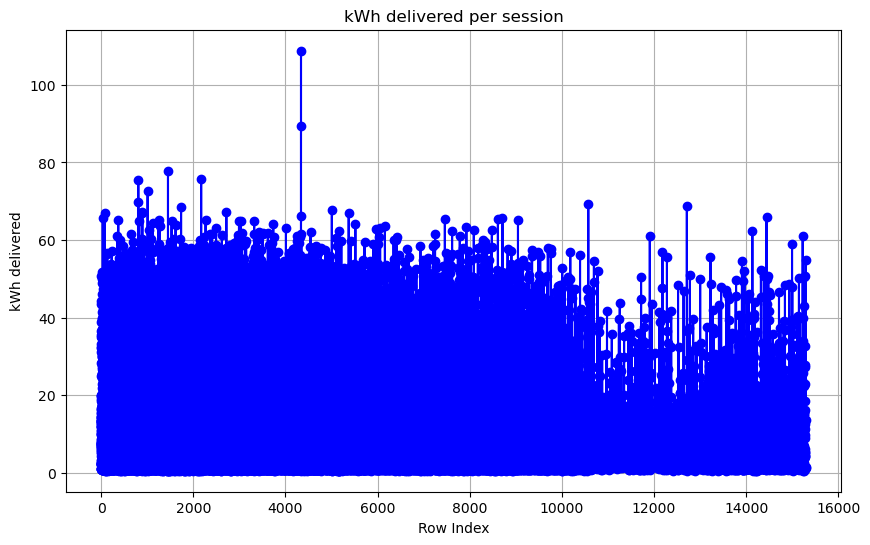

In [30]:
# Plot the differences in kWh delivery per session
plt.figure(figsize=(10, 6))
plt.plot(df_charging['kWhDelivered'], marker='o', linestyle='-', color='b')
plt.title('kWh delivered per session')
plt.xlabel('Row Index')
plt.ylabel('kWh delivered')
plt.grid(True)
plt.show()

In [24]:
print(df_charging['kWhDelivered'].describe())

count    66450.000000
mean        11.787916
std         10.314789
min          0.501000
25%          5.097000
50%          9.140000
75%         14.183000
max        108.797242
Name: kWhDelivered, dtype: float64


### 4) Trade-off 'kWh requested' and 'kWh delivered'

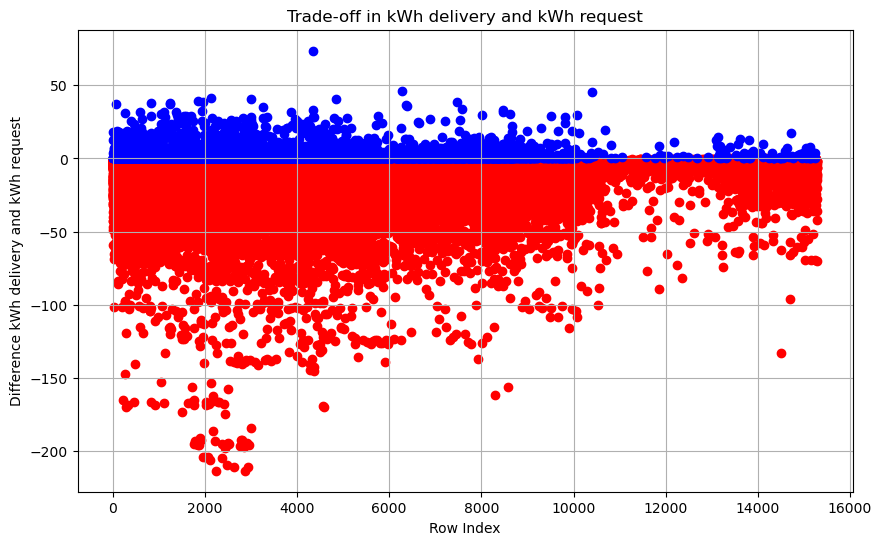

In [22]:
# Plot the difference in kWh request and kWh delivery (to show if requests have been fulfilled (positive, blue) or not (negative, red))
plt.figure(figsize=(10, 6))
#plt.plot(df_charging['user_kWhRequestFulfilment'], marker='o', linestyle='-', color='b')
plt.scatter(df_charging[df_charging['user_kWhRequestFulfilment'] < 0].index, df_charging[df_charging['user_kWhRequestFulfilment'] < 0]['user_kWhRequestFulfilment'], color='red', label='bad')
plt.scatter(df_charging[df_charging['user_kWhRequestFulfilment'] >= 0].index, df_charging[df_charging['user_kWhRequestFulfilment'] >= 0]['user_kWhRequestFulfilment'], color='blue', label='good')
plt.title('Trade-off in kWh delivery and kWh request')
plt.xlabel('Row Index')
plt.ylabel('Difference kWh delivery and kWh request')
plt.grid(True)
plt.show()

In [25]:
print(df_charging['user_kWhRequestFulfilment'].describe())

count    49187.000000
mean       -11.664412
std         16.563644
min       -213.686000
25%        -14.594000
50%         -6.534000
75%         -2.800500
max         73.709242
Name: user_kWhRequestFulfilment, dtype: float64


In [47]:
# Don't forget to delete!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df_charging[df_charging['user_kWhRequestFulfilment'].isnull()]
#df_charging[df_charging['user_kWhRequestFulfilment'] > 40]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,NoChargingTime,...,user_paymentRequired_values,user_userID,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment,station
Index,,,,,,,,,,,,,,,,,,,,,
11,5e23b149f9af8b5fe4b973da,2020-01-02 15:04:38+00:00,2020-01-02 23:33:26+00:00,2020-01-02 22:48:48+00:00,0.812,1,AG-1F14,1-1-194-818,nan,0 days 00:44:38,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,1
41,5e23b149f9af8b5fe4b973f8,2020-01-02 17:21:05+00:00,2020-01-02 20:10:40+00:00,2020-01-02 19:59:39+00:00,0.852,1,AG-4F50,1-1-191-782,nan,0 days 00:11:01,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,1
180,5e2a48e8f9af8b75aed8e941,2020-01-07 14:31:09+00:00,2020-01-08 00:46:30+00:00,2020-01-07 15:07:06+00:00,0.847,1,AG-3F32,1-1-179-800,nan,0 days 09:39:24,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,1
193,5e2a48e8f9af8b75aed8e94e,2020-01-07 15:00:25+00:00,2020-01-07 23:30:37+00:00,2020-01-07 22:54:11+00:00,0.735,1,AG-3F17,1-1-179-779,nan,0 days 00:36:26,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,1
265,5e2b9a62f9af8b7d745b131d,2020-01-08 15:01:52+00:00,2020-01-08 19:01:39+00:00,2020-01-08 16:33:58+00:00,0.769,1,AG-3F21,1-1-179-801,nan,0 days 02:27:41,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,5d54a7cff9af8b413ec70556,2019-07-29 13:46:52+00:00,2019-07-30 00:18:54+00:00,2019-07-30 00:08:24+00:00,1.489,1,AG-3F32,1-1-179-800,nan,0 days 00:10:30,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,1
9954,5d54a7cff9af8b413ec70583,2019-07-30 00:33:36+00:00,2019-07-30 00:56:04+00:00,2019-07-30 00:57:03+00:00,0.617,1,AG-1F05,1-1-193-816,nan,-1 days +23:59:01,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,1
9959,5d55f950f9af8b45dfb3d876,2019-07-30 12:32:29+00:00,2019-07-31 01:55:43+00:00,2019-07-31 01:07:04+00:00,1.912,1,AG-1F01,1-1-193-825,nan,0 days 00:48:39,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,1
